In [75]:
import argparse, json, time, random
import hashlib, torch, math, pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from task_and_training import *
import os

data/hdtrainCTRNN_2ORI1O_dr50_n0.1_la0_rr3/
data/hdtrainCTRNN_2ORI1O_dr50_n0.1_la0_rr4/
data/hdtrainCTRNN_2ORI1O_dr50_n0.1_la0_rr5/
data/hdtrainCTRNN_2ORI1O_dr100_n0.1_la0_rr3/
data/hdtrainCTRNN_2ORI1O_dr150_n0.1_la0_rr1/
data/hdtrainCTRNN_2ORI1O_dr150_n0.1_la0_rr2/
data/hdtrainCTRNN_2ORI1O_dr150_n0.1_la0_rr3/
data/hdtrainCTRNN_2ORI1O_dr150_n0.1_la0_rr4/
data/hdtrainCTRNN_2ORI1O_dr150_n0.1_la0_rr5/
data/hdtrainCTRNN_2ORI1O_dr200_n0.1_la0_rr1/
data/hdtrainCTRNN_2ORI1O_dr200_n0.1_la0_rr2/
data/hdtrainCTRNN_2ORI1O_dr200_n0.1_la0_rr3/
data/hdtrainCTRNN_2ORI1O_dr200_n0.1_la0_rr4/
data/hdtrainCTRNN_2ORI1O_dr200_n0.1_la0_rr5/
data/hdtrainCTRNN_2ORI1O_dr250_n0.1_la0_rr1/
data/hdtrainCTRNN_2ORI1O_dr250_n0.1_la0_rr2/
data/hdtrainCTRNN_2ORI1O_dr250_n0.1_la0_rr3/
data/hdtrainCTRNN_2ORI1O_dr250_n0.1_la0_rr4/
data/hdtrainCTRNN_2ORI1O_dr250_n0.1_la0_rr5/
data/hdrchangeCTRNN_2ORI1O_dr150_n0.1_sa70.0_r1/
data/hdrchangeCTRNN_2ORI1O_dr150_n0.1_sa70.0_r2/
data/hdrchangeCTRNN_2ORI1O_dr150_n0.1_sa70.0_r3/
d

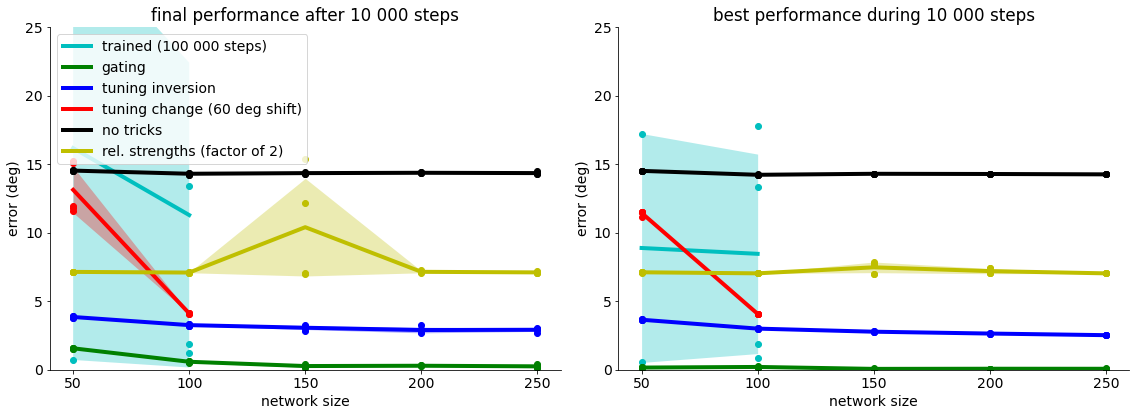

In [94]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(dim_recurrents))
final_errors = torch.zeros(len(randoms), len(dim_recurrents))


fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            t = ""
            if network=="rchange": t += "_sa70.0"
            if network=="relstrengths": t += "_mf2.0"
            #t = ""
            if network=="train": 
                t += "_la0"
                random = "r"+str(random)
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}{t}_r{random}/"
            if not os.path.exists(f"{directory}info.json"):
                final_errors[j, i] = float('nan')
                best_errors[j, i] = float('nan')
                print(directory)
                continue
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    # outliers
    if network == "gating":
        final_errors[3, 3] = float('nan')
        best_errors[3, 3] = float('nan')
    if network == "relstrengths":
        final_errors[final_errors>30] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), best_errors, color=color)
    ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.scatter(torch.tensor(dim_recurrents).repeat(len(dim_recurrents), 1), final_errors, color=color)
    ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)

_plot("train", "trained (100 000 steps)", "c")
_plot("gating", "gating", "g")
_plot("inversion", "tuning inversion", "b")
_plot("rchange", "tuning change (60 deg shift)", "r")
_plot("notricks", "no tricks", "k")
_plot("relstrengths", "rel. strengths (factor of 2)", "y")
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 25)
ax_b.set_ylim(0, 25)
plt.tight_layout()
print("Occasional outlieas are removed when the network did not learn")
plt.show()

network size is 100


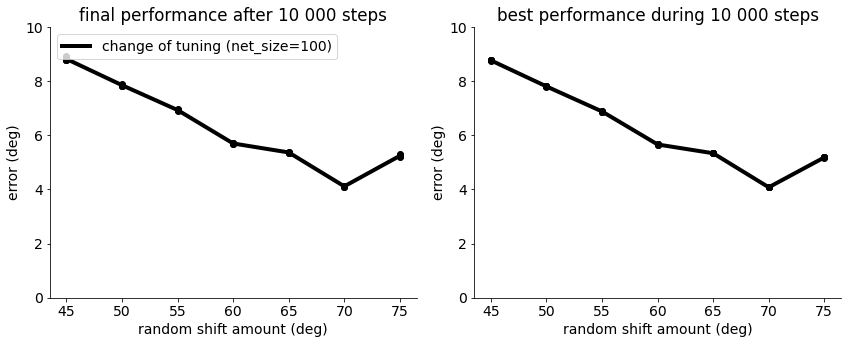

In [91]:
dim_recurrent = 100
shift_amounts = [45, 50, 55, 60, 65, 70, 75]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(shift_amounts))
final_errors = torch.zeros(len(randoms), len(shift_amounts))

network, label, color = "rchange", "change of tuning (net_size=100)", "k"
fig = plt.figure(figsize=(12, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

for i, shift_amount in enumerate(shift_amounts):
    for j, random in enumerate(randoms):
        directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_sa{shift_amount:.1f}_r{random}/"
        with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
            js = json.load(f)
        final_errors[j, i] = js["errors"][2]
        best_errors[j, i] = js["errors"][6] 
# plot
mean = torch.nanmean(best_errors, dim=0) 
sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
ax_b.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), best_errors, color=color)
ax_b.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_b.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
mean = torch.nanmean(final_errors, dim=0) 
sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
ax_f.scatter(torch.tensor(shift_amounts).repeat(len(randoms), 1), final_errors, color=color)
ax_f.fill_between(shift_amounts, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_f.plot(shift_amounts, mean, "-", linewidth=4, label=label, color=color)
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"random shift amount (deg)")
ax_b.set_xlabel(f"random shift amount (deg)")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(shift_amounts)
ax_b.set_xticks(shift_amounts)
ax_f.set_ylim(0, 10)
ax_b.set_ylim(0, 10)
plt.tight_layout()
print("network size is 100")
plt.show()

In [81]:
best_errors

tensor([[8.7766, 7.8127, 6.8777, 5.6639, 5.3376, 4.0810, 5.1870],
        [8.7666, 7.8081, 6.8806, 5.6630, 5.3392, 4.0785, 5.1891],
        [8.7666, 7.8087, 6.8897, 5.6718, 5.3391, 4.0865, 5.1826],
        [8.7902, 7.8154, 6.8819, 5.6561, 5.3386, 4.0817, 5.1831],
        [8.7413, 7.7868, 6.8781, 5.6598, 5.3387, 4.0801, 5.1792]])

network size is 100


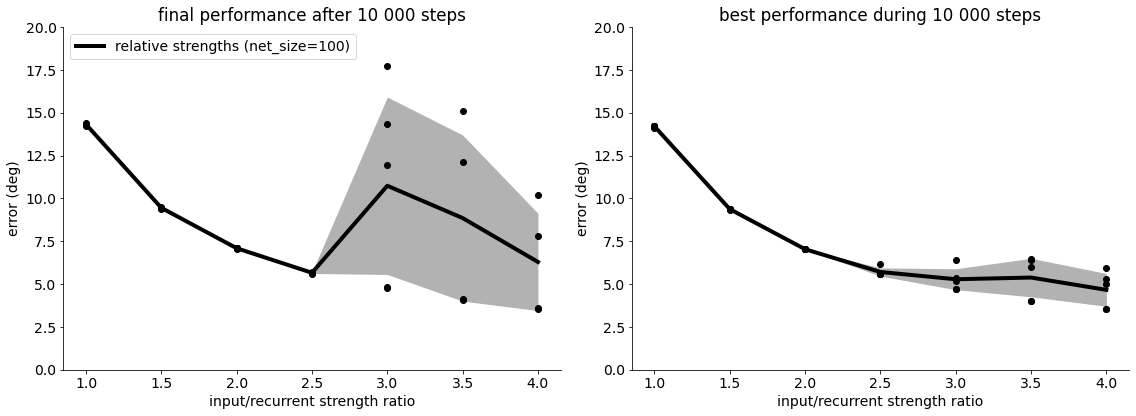

In [88]:
dim_recurrent = 100
magnitude_factors = [1, 1.5, 2, 2.5, 3, 3.5, 4]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(magnitude_factors))
final_errors = torch.zeros(len(randoms), len(magnitude_factors))

network, label, color = "relstrengths", "relative strengths (net_size=100)", "k"
fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

for i, magnitude_factor in enumerate(magnitude_factors):
    for j, random in enumerate(randoms):
        directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_mf{magnitude_factor:.1f}_r{random}/"
        with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
            js = json.load(f)
        final_errors[j, i] = js["errors"][2]
        best_errors[j, i] = js["errors"][6] 
    final_errors[final_errors>30] = float('nan')
# plot
mean = torch.nanmean(best_errors, dim=0) 
sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
ax_b.scatter(torch.tensor(magnitude_factors).repeat(len(randoms), 1), best_errors, color=color)
ax_b.fill_between(magnitude_factors, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_b.plot(magnitude_factors, mean, "-", linewidth=4, label=label, color=color)
mean = torch.nanmean(final_errors, dim=0) 
sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
ax_f.scatter(torch.tensor(magnitude_factors).repeat(len(randoms), 1), final_errors, color=color)
ax_f.fill_between(magnitude_factors, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
ax_f.plot(magnitude_factors, mean, "-", linewidth=4, label=label, color=color)
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"input/recurrent strength ratio")
ax_b.set_xlabel(f"input/recurrent strength ratio")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(magnitude_factors)
ax_b.set_xticks(magnitude_factors)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
print("network size is 100")
plt.tight_layout()
plt.show()

In [87]:
final_errors

tensor([[14.3632,  9.4671,  7.1096,  5.6096,  4.7957,  4.1546,  3.5949],
        [14.3208,  9.5083,  7.0773,  5.6467, 14.3611,  4.0924,  3.5636],
        [14.3761,  9.4351,  7.1028, 49.7496, 11.9780, 47.3953, 10.1874],
        [14.3081,  9.3865,  7.0884,  5.6681,  4.8251, 15.0736, 34.4062],
        [14.2271,  9.4479,  7.0856,  5.7142, 17.7349, 12.1024,  7.8323]])